In [9]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import pandas as pd 
import ipywidgets as widgets
from IPython.display import display
from ipywidgets import interact, interactive, interact_manual
import os
plt.rcParams.update({
    "text.usetex": False,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})
sns.set_context("paper")
# sns.set(font_scale = 1.2)
sns.set_style("ticks")
sns.set_palette("deep")
sns.set_palette("twilight_shifted_r")

In [10]:
data_csv = "./data.csv"
data_df = pd.read_csv(data_csv, comment='#')
data_df

,variation,variable,scenario,time
0,analysis,16,ideal,534.5512
1,analysis,16,transit,1201.9992
2,analysis,16,increasing0.25,516.9730
3,analysis,16,increasing0.5,595.4113
4,analysis,16,increasing0.75,886.6975
5,analysis,16,decreasing0.25,516.9730
6,analysis,16,decreasing0.5,595.4113
7,analysis,16,decreasing0.75,886.6975
8,analysis,2,ideal,76.7431
9,analysis,2,transit,151.2787


In [11]:
!export PATH="/home/tudo/.vscode-server/bin/dfd34e8260c270da74b5c2d86d61aee4b6d56977/bin/remote-cli:/home/tudo/software/opt/texlive/bin/x86_64-linux:/home/tudo/software/opt/wrench/bin:/home/tudo/software/opt/simgrid/bin:/home/tudo/software/install/bin:/usr/local/bin:/usr/bin:/usr/local/sbin:/usr/sbin:/home/tudo/.local/bin:/home/tudo/.local/bin"
!echo $PATH
!which latex

/usr/bin:/home/tudo/.vscode-server/bin/dfd34e8260c270da74b5c2d86d61aee4b6d56977/bin/remote-cli:/home/tudo/software/opt/texlive/bin/x86_64-linux:/home/tudo/software/opt/wrench/bin:/home/tudo/software/opt/simgrid/bin:/home/tudo/software/install/bin:/usr/local/bin:/usr/bin:/usr/local/sbin:/usr/sbin:/home/tudo/.local/bin:/home/tudo/.local/bin
/usr/bin/latex


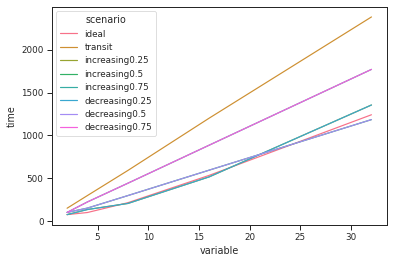

In [12]:
analysis_df = data_df[data_df['variation'] == 'analysis']
ax = sns.lineplot(x='variable', y='time', hue='scenario', data=analysis_df)